In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

#Girafa

##Contorno

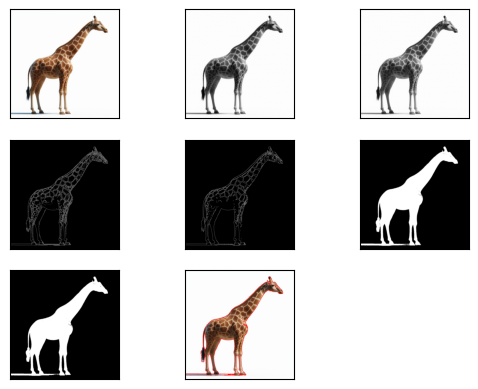

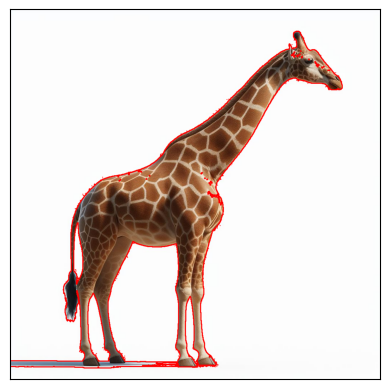

In [ ]:
#Importa e converta para RGB
img = cv2.imread('./imagens/GIRAFA.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)



#Convertendo para preto e branco (RGB -> Gray Scale -> BW)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
a = img_gray.max()
_, thresh = cv2.threshold(img_gray, a/1.05, a,cv2.THRESH_BINARY_INV)


tamanhoKernel = 3
kernel = np.ones((tamanhoKernel,tamanhoKernel), np.uint8)
thresh_open = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

#Filtro de ruído (bluring)
img_blur = cv2.blur(img_gray, ksize=(tamanhoKernel,tamanhoKernel))

# Detecção borda com Canny (sem blurry)
edges_gray = cv2.Canny(image=img_gray, threshold1=a/2, threshold2=a/2)
# Detecção borda com Canny (com blurry)
edges_blur = cv2.Canny(image=img_blur, threshold1=a/2, threshold2=a/2)



# contorno
contours, hierarchy = cv2.findContours(
                                   image = thresh,
                                   mode = cv2.RETR_TREE,
                                   method = cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key = cv2.contourArea, reverse = True)
img_copy = img.copy()
final = cv2.drawContours(img_copy, contours, contourIdx = -1,
                         color = (255, 0, 0), thickness = 2)


#plot imagens
imagens = [img,img_blur,img_gray,edges_gray,edges_blur,thresh,thresh_open,final]
formatoX = math.ceil(len(imagens)**.5)
if (formatoX**2-len(imagens))>formatoX:
    formatoY = formatoX-1
else:
    formatoY = formatoX
for i in range(len(imagens)):
    plt.subplot(formatoY, formatoX, i + 1)
    plt.imshow(imagens[i],'gray')
    plt.xticks([]),plt.yticks([])
plt.show()

plt.imshow(imagens[len(imagens)-1], 'gray')
plt.xticks([]),plt.yticks([])
plt.show()


#SATELITE

##Contorno

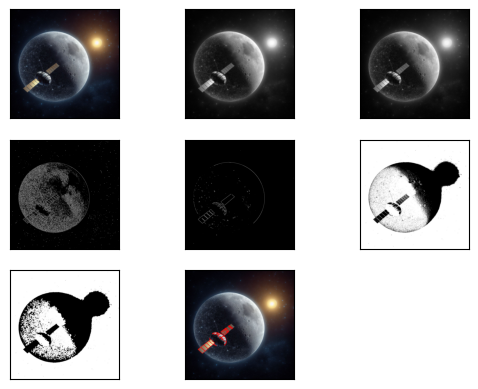

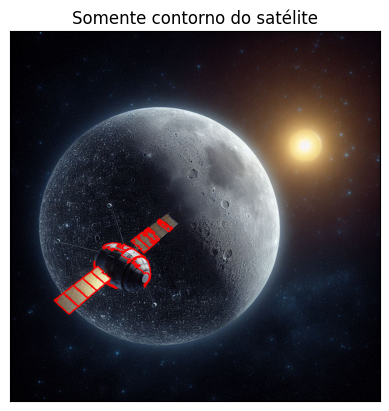

In [ ]:

img = cv2.imread('./Satelite.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
a = img_gray.max()

_, thresh = cv2.threshold(img_gray, a * 0.33, a, cv2.THRESH_BINARY_INV)

tamanhoKernel = 5
kernel = np.ones((tamanhoKernel, tamanhoKernel), np.uint8)
thresh_open = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

img_blur = cv2.blur(img_gray, ksize=(tamanhoKernel, tamanhoKernel))

edges_gray = cv2.Canny(image=img_gray, threshold1=a / 2, threshold2=a / 2)
edges_blur = cv2.Canny(image=img_blur, threshold1=a / 2, threshold2=a / 2)

contours, hierarchy = cv2.findContours(
    image=thresh,
    mode=cv2.RETR_TREE,
    method=cv2.CHAIN_APPROX_SIMPLE)

contours = sorted(contours, key=cv2.contourArea, reverse=True)

img_copy = img.copy()

area_min = 500
area_max = 10000

for cnt in contours:
    area = cv2.contourArea(cnt)
    if area_min < area < area_max:
        cv2.drawContours(img_copy, [cnt], -1, (255, 0, 0), 2)

imagens = [img, img_blur, img_gray, edges_gray, edges_blur, thresh, thresh_open, img_copy]
formatoX = math.ceil(len(imagens) ** 0.5)
formatoY = formatoX if (formatoX ** 2 - len(imagens)) <= formatoX else formatoX - 1

for i in range(len(imagens)):
    plt.subplot(formatoY, formatoX, i + 1)
    plt.imshow(imagens[i], 'gray')
    plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(img_copy)
plt.xticks([]), plt.yticks([])
plt.title("Somente contorno do satélite")
plt.show()

#AVIÃO

##Contorno

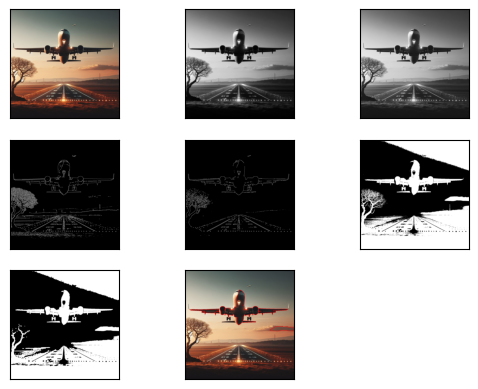

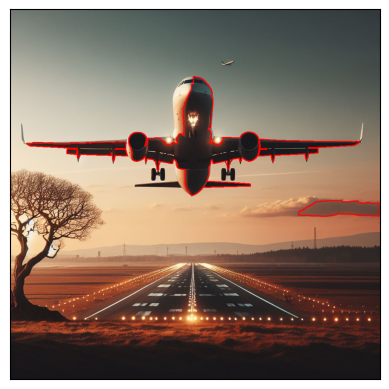

In [12]:

img = cv2.imread('./Aviao.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
a = img_gray.max()

_, thresh = cv2.threshold(img_gray, a * 0.4, a, cv2.THRESH_BINARY_INV)


tamanhoKernel = 5
kernel = np.ones((tamanhoKernel, tamanhoKernel), np.uint8)
thresh_open = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)


img_blur = cv2.blur(img_gray, ksize=(tamanhoKernel, tamanhoKernel))

edges_gray = cv2.Canny(image=img_gray, threshold1=a/2, threshold2=a/2)
edges_blur = cv2.Canny(image=img_blur, threshold1=a/2, threshold2=a/2)

contours, hierarchy = cv2.findContours(
    image=thresh_open,
    mode=cv2.RETR_TREE,
    method=cv2.CHAIN_APPROX_SIMPLE)

min_area = 5000
max_area = 100000
altura_img = img.shape[0]

filtered_contours = []
for cnt in contours:
    area = cv2.contourArea(cnt)
    if min_area < area < max_area:
        _, y, _, h = cv2.boundingRect(cnt)
        if y + h/2 < altura_img * 0.7:
            filtered_contours.append(cnt)


img_copy = img.copy()
final = cv2.drawContours(img_copy, filtered_contours, contourIdx=-1,
                         color=(255, 0, 0), thickness=2)

imagens = [img, img_blur, img_gray, edges_gray, edges_blur, thresh, thresh_open, final]
formatoX = math.ceil(len(imagens) ** 0.5)
formatoY = formatoX if (formatoX ** 2 - len(imagens)) <= formatoX else formatoX - 1

for i in range(len(imagens)):
    plt.subplot(formatoY, formatoX, i + 1)
    plt.imshow(imagens[i], 'gray')
    plt.xticks([]), plt.yticks([])

plt.show()

plt.imshow(final, 'gray')
plt.xticks([]), plt.yticks([])
plt.show()